## CPSC 340 Lecture 15: accompanying demo

Idea: show that overfitting corresponds to large values of the weights

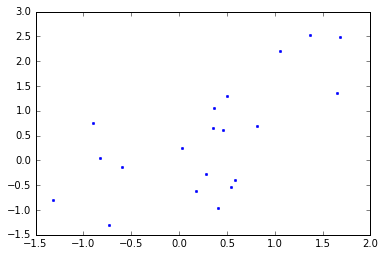

In [83]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.linalg as npla
%matplotlib inline

# generate some random data in 1-d
N = 20
X = npr.randn(N)
y = npr.randn(N) + X

plt.plot(X,y,'.',markersize=5)

[ 28949.21602834]


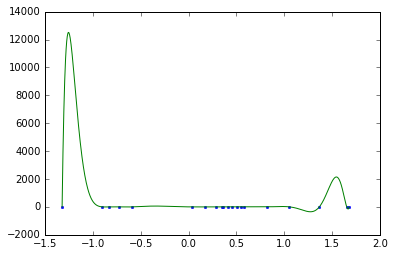

In [84]:
pf = PolynomialFeatures(N-1)
Z = pf.fit_transform(X[:,None])
w = npla.solve(Z.T @ Z, Z.T @ y)[:,None]
grid = np.linspace(min(X),max(X),1000)[:,None]
grid_poly = pf.fit_transform(grid)

plt.plot(X,y,'.',markersize=5)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

[ 0.71633543]


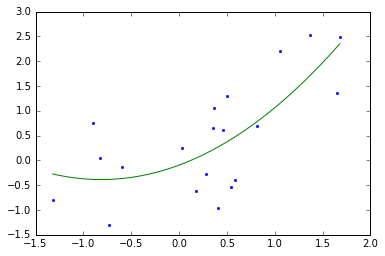

In [85]:
# solution 1: lower degree polynomial
pf = PolynomialFeatures(2)
Z = pf.fit_transform(X[:,None])

w = npla.solve(Z.T @ Z, Z.T @ y)[:,None]

plt.plot(X,y,'.',markersize=5)
grid_poly = pf.fit_transform(grid)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

[ 0.14048658]


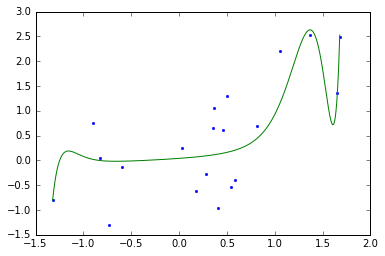

In [86]:
# solution 2: add regularization
pf = PolynomialFeatures(N-1)
Z = pf.fit_transform(X[:,None])

reg_strength = 10.0
w = npla.solve(Z.T @ Z + reg_strength*np.eye(N), Z.T @ y)[:,None]

plt.plot(X,y,'.',markersize=5)
grid_poly = pf.fit_transform(grid)
plt.plot(grid, grid_poly@w)
print(max(abs(w)))

- In this case, regularization helped but did not seem that amazing. However, what if the true relationship really was complicated? Then if we restricted the degree of the polynomial, we'd miss out on it. 
- We can add regularization to many models, not just least squares with a polynomial basis.